# Curso de Big Data

## Trabajo Práctico 2

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el código sea fácil de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Domingo 22 de octubre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”.
- Asegurense de haber creado una carpeta llamada TP2. Deben entregar un reporte (pdf) y el código (jupyter notebook). Ambos deben estar dentro de esa carpeta.
- También deben completar el link de su repositorio -para que pueda ser clonado y corregido- en la siguiente google sheet: https://docs.google.com/spreadsheets/d/1A7fPh5PpYWqjh0QER_alW8HIAiGWNX8Z/edit#gid=1820558252
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que:
    - No completen la google sheet hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se  corregirán sus tareas hasta no ver el link en la google sheet.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.

### Reglas de formato y presentación

- El trabajo debe tener una extensión máxima de 8 páginas (no se permite Apéndice). Se espera una buena redacción en la resolución del práctico.

- El informe debe ser entregado en formato PDF, con los gráficos e imágenes en este mismo archivo.

- Entregar el código con los comandos utilizados, identificando claramente a qué inciso corresponde cada comando.

## Parte I: Analizando la base

La Encuesta Permanente de Hogares (EPH) es un programa nacional de producción sistemática y permanente de indicadores sociales que lleva a cabo el Instituto Nacional de Estadística y Censos (INDEC), que permite conocer las características  sociodemográficas y socioeconómicas de la población. Uno de los indicadores más valiosos que pueden obtenerse con los datos extraídos de esta encuesta es la tasa de pobreza.

### 1. Utilizando información disponible en la página del INDEC, expliquen brevemente cómo se identifica a las personas pobres.

In [1]:
print("En el PDF.")

En el PDF.


### 2. Entren a la página https://www.indec.gob.ar/ y vayan a la sección Servicios y Herramientas > Bases de datos. Descarguen la base de microdatos de la Encuesta Permanente de Hogares (EPH) correspondiente al primer trimestre de 2023 en formato xls (una vez descargada, la base a usar debería llamarse usu individual T123.xls). En la página web, también encontrará un diccionario de variables con el nombre de ”Diseño de registro y estructura para las bases preliminares (hogares y personas)”; este archivo les indica qué significa cada variable que aparece en la base de datos, en particular, en la sección de Diseño de registros de la base Personas.

(a) Eliminen todas las observaciones que no corresponden a los aglomerados
de Ciudad Autónoma de Buenos Aires o Gran Buenos Aires.

In [2]:
# Importamos paquetes a utilizar

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier


# Cargamos la data

data = pd.read_excel("usu_individual_T123.xlsx")

#print(len(data))

In [3]:
# Procedemos a eliminar todas las observaciones que no corresponden a las regiones de CABA (32) y Partidos del GBA (33).

# Filtramos mediante un booleano, quedandonos únicamente con los que son del aglomerado 32 (CABA) y 33 (GBA).
datav2 = data[data['AGLOMERADO'].isin([32, 33])]

#datav2.sample(15)
#print(len(datav2))

(b) Si hay observaciones con valores que no tienen sentido, descártenlas (ingresos
y edades negativos, por ejemplo).

In [4]:
# Creamos una lista de las columnas a revisar, la de edad y las de ingreso.\

check = [
    "CH06",
    "PP06C",
    "PP06D",
    "PP08D1",
    "PP08D4",
    "PP08F1",
    "PP08F2",
    "PP08J1",
    "PP08J2",
    "P21",
    "TOT_P12",
    "P47T",
    "V2_M",
    "V3_M",
    "V4_M",
    "V5_M",
    "V8_M",
    "V9_M",
    "V10_M",
    "V11_M",
    "V12_M",
    "V18_M",
    "V21_M",
    "T_VI",
]

# Filtramos los valores negativos de las columnas especificadas.

datav3 = datav2[~(datav2[check] < 0).any(axis=1)]

# Controlamos cuantos datos nos quedaron

#print(len(datav3))

(c) Una vez hecha esa limpieza, realicen un gráfico de barras mostrando la
composición por sexo

0.4680349932705249
0.5319650067294751


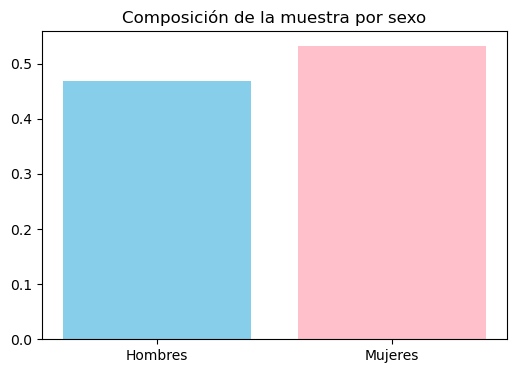

In [5]:
# Count the number of men and women.
hombres_count = (datav3['CH04'] == 1).sum()
mujeres_count = (datav3['CH04'] == 2).sum()

# Calculate the total count.
total_count = len(datav3)

# Calculate the percentages.
H = hombres_count / total_count
M = mujeres_count / total_count

print(H)
print(M)

# Create the bar chart of the composition by gender.
plt.figure(figsize=(6, 4))
plt.bar(['Hombres', 'Mujeres'], [H, M], color=['skyblue', 'pink'])
plt.title("Composición de la muestra por sexo")
plt.show()


(d) Realicen una matriz de correlación con las siguientes variables: CH04,
CH07, CH08, NIVEL ED, ESTADO, CAT INAC, IPCF. Comenten los resultados.
Utilicen alguno de los comandos disponibles en este link o este link
para graficar la matriz de correlación.

Text(0.5, 1.0, 'Heatmap de correlaciones')

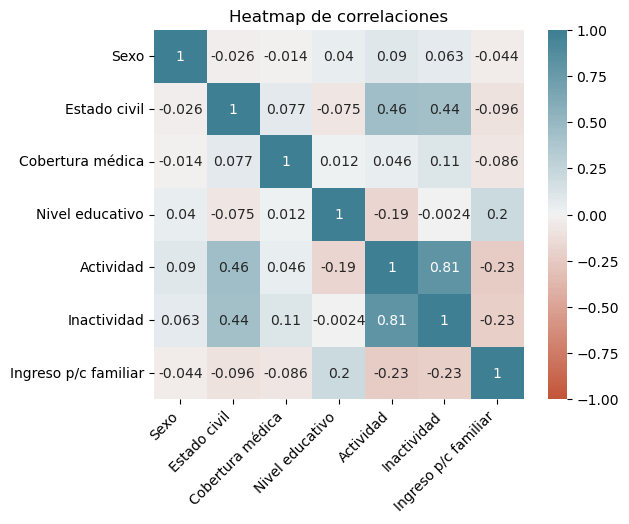

In [6]:
# Realizamos la matriz de correlación. Para aquello importamos el paquete necesario.

import seaborn as sns

# Seleccionamos las matrices a analizar.

corr_col = ['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']

# Creamos el data frame con esas columnas.

datav4 = datav3[corr_col]

# Calculamos la correlación.

corr = datav4.corr()

# Imprimimos el heatmap.

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0, annot = True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.set_xticklabels(["Sexo", "Estado civil", "Cobertura médica", "Nivel educativo", "Actividad", "Inactividad", "Ingreso p/c familiar"]),
    rotation=45,
    horizontalalignment='right'
);
ax.set_yticklabels(
    ax.set_yticklabels(["Sexo", "Estado civil", "Cobertura médica", "Nivel educativo", "Actividad", "Inactividad", "Ingreso p/c familiar"]),
    rotation=0,
);
#Sumamos el título
plt.title("Heatmap de correlaciones")

(e) ¿Cúantos desocupados hay en la muestra? ¿Cúantos inactivos? ¿Cúal es
la media de ingreso per cápita familiar (IPCF) según estado (ocupado,
desocupado, inactivo)?

In [7]:
# Contamos los desocupados e inactivos presentes en nuestra muestra.

print("En la muestra hay",datav3['ESTADO'].value_counts()[2], "personas clasificadas como desocupadas.")

# Contamos cuántos inactivos hay en la muestra
print("En la muestra hay",datav3['ESTADO'].value_counts()[3], "personas clasificadas como inactivas.")

# Ahora calculamos la media de IPCF de cada estado:

print(datav3.groupby(by = ["ESTADO"]).agg({"IPCF":"mean"}))

En la muestra hay 264 personas clasificadas como desocupadas.
En la muestra hay 2540 personas clasificadas como inactivas.
                IPCF
ESTADO              
0           0.000000
1       94025.922410
2       27664.024053
3       44753.112126
4       33758.999634


(f) Utilizando el archivo tabla_adulto_equiv.xlsx, agreguen a su base de
datos una columna llamada adulto_equiv que contenga los valores de
adulto equivalente de cada persona según su sexo y edad (por ejemplo,
a un varón de 2 años le corresponde 0.46). Finalmente, con el comando
groupby sumen esta nueva columna para las personas que pertenecen a un
mismo hogar y guarden ese dato en una columna llamada ad_equiv_hogar.

In [8]:
# Importamos el archivo
# Importamos la tabla de equivalencias

data_adult=pd.read_excel("tabla_adulto_equiv.xlsx", header = 4, nrows=23, ) #formateamos para que se cargue correctamente la base.
data_adult.rename({'Unnamed: 0':'Edad','Unnamed: 1':'Mujeres','Unnamed: 2':'Hombres'}, axis=1, inplace = True) # Renombramos las columnas.
#data_adult

#print(len(data_adult))

#print(data_adult)


In [9]:
#Creamos una función que calcula los valores:

def calcular_adulto_equiv(sexo, edad): # Esta función toma dos argumentos: el sexo y la edad. Mediante un "if" filtra primero por sexo y luego por edad, para devolvernos el valor de adulto equivalente correspondiente.
    # para los hombres:
    if sexo == 1:
        if edad < 0:
            return 0.35
        elif edad == 1:
            return 0.37
        elif edad == 2:
            return 0.46
        elif edad == 3:
            return 0.51
        elif edad == 4:
            return 0.55
        elif edad == 5:
            return 0.6
        elif edad == 6:
            return 0.64
        elif edad == 7:
            return 0.66
        elif edad == 8:
            return 0.68
        elif edad == 9:
            return 0.69
        elif edad == 10:
            return 0.79
        elif edad == 11:
            return 0.82
        elif edad == 12:
            return 0.85
        elif edad == 13:
            return 0.90
        elif edad == 14:
            return 0.96
        elif edad == 15:
            return 1
        elif edad == 16:
            return 1.03
        elif edad == 17:
            return 1.04
        elif 18 <= edad <= 29:
            return 1.02
        elif 30 <= edad <= 45:
            return 1.00
        elif 46 <= edad <= 60:
            return 1.00
        elif 61 <= edad <= 75:
            return 0.83
        elif edad > 75:
            return 0.74
        else:
            print("hay un problema")

    # Para las mujeres:
    elif sexo == 2:
        if edad < 0:
            return 0.35
        elif edad == 1:
            return 0.37
        elif edad == 2:
            return 0.46
        elif edad == 3:
            return 0.51
        elif edad == 4:
            return 0.55
        elif edad == 5:
            return 0.6
        elif edad == 6:
            return 0.64
        elif edad == 7:
            return 0.66
        elif edad == 8:
            return 0.68
        elif edad == 9:
            return 0.69
        elif edad == 10:
            return 0.70
        elif edad == 11:
            return 0.72
        elif edad == 12:
            return 0.74
        elif edad == 13:
            return 0.76
        elif edad == 14:
            return 0.76
        elif edad == 15:
            return 0.77
        elif edad == 16:
            return 0.77
        elif edad == 17:
            return 0.77
        elif 18 <= edad <= 29:
            return 0.76
        elif 30 <= edad <= 45:
            return 0.77
        elif 46 <= edad <= 60:
            return 0.76
        elif 61 <= edad <= 75:
            return 0.67
        elif edad > 75:
            return 0.63
        else:
            print("hay un problema")

# Ahora aplicamos la función a nuestro dataframe, y guardamos el valor que nos arroja la función en una nueva columna.
datav3['adulto_equiv'] = datav3.apply(lambda row: calcular_adulto_equiv(row['CH04'], row['CH06']), axis=1).copy()

#datav3.sample(25)


C:\Users\cufa9\AppData\Local\Temp\ipykernel_11120\2606624732.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datav3['adulto_equiv'] = datav3.apply(lambda row: calcular_adulto_equiv(row['CH04'], row['CH06']), axis=1).copy()


In [10]:
# Creamos una nueva columna, agrupando por hogar, de la suma de los adult_equiv.

datav3["ad_equiv_hogar"] = datav3.groupby(['CODUSU', 'NRO_HOGAR'])["adulto_equiv"].transform('sum')
#datav3.sample(30)

C:\Users\cufa9\AppData\Local\Temp\ipykernel_11120\2598909372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datav3["ad_equiv_hogar"] = datav3.groupby(['CODUSU', 'NRO_HOGAR'])["adulto_equiv"].transform('sum')


### 3. Uno de los grandes problemas de la EPH es la creciente cantidad de hogares que no reportan sus ingresos (ver por ejemplo el siguiente informe). ¿Cúantas personas no respondieron cúal es su ingreso total familiar (ITF)? Guarden como una base distinta llamada respondieron las observaciones donde respondieron la pregunta sobre su ITF. Las observaciones con ITF = 0 gúardenlas en una base bajo el nombre norespondieron.

In [11]:
# Contamos la cantidad de personas que no respondieron

print("La cantidad de personas que no respondieron es:", datav3['ITF'].value_counts()[0])

# Guardamos un dataframe con los datos de las personas que si contestaron.

respondieron = datav3[datav3["ITF"]!=0]

# Guardamos en otro data frame las personas que no respondieron.

norespondieron = datav3[datav3["ITF"]==0]

La cantidad de personas que no respondieron es: 1786


### 4. Sabiendo que la Canasta Básica Total para un adulto equivalente en el Gran Buenos Aires en el primer trimestre de 2023 es aproximadamente $57.371, 05, agreguen a la base respondieron una columna llamada ingreso necesario que sea el producto de este valor por ad equiv hogar. Note que este es el valor mínimo que necesita ese hogar para no ser pobre.

In [12]:
# Creamos una función que calcula la CBT para cada hogar, tomando como argumento el número de ad_equiv_hogar.

def CBT (ad_equiv_hogar):
    return ad_equiv_hogar * 57371.05

print(CBT(2))

114742.1


In [13]:
# Creamos una nueva columna con el monto de CBT para cada hogar:

datav3['ingreso_necesario'] = datav3.apply(lambda row: CBT(row['ad_equiv_hogar']), axis=1).copy()

#datav3.sample(30)


C:\Users\cufa9\AppData\Local\Temp\ipykernel_11120\2522249564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datav3['ingreso_necesario'] = datav3.apply(lambda row: CBT(row['ad_equiv_hogar']), axis=1).copy()


### 5. Por último, agreguen a respondieron una columna llamada pobre que tome valor 1 si el ITF es menor al ingreso necesario que necesita esa familia, y 0 en caso contrario. ¿Cúantos pobres identificaron?

In [14]:
# Actualizamos el data frame 'respondieron' para que incluya los valores de 'ingreso_necesario'

respondieron = datav3[datav3["ITF"]!=0]

#print(respondieron)

In [15]:
# Creamos una función que controla si el ingreso del hogar es mayor al ingreso necesario estimado:

def polenta(hornero, hornero_necesario):
    if hornero < hornero_necesario:
        return 1
    else:
        return 0

In [16]:
# Aplicamos y creamos una nueva columna con la función previamente definida.

respondieron['pobre'] = respondieron.apply(lambda row: polenta(row['ITF'], row['ingreso_necesario']), axis=1)

#respondieron.sample(20)

C:\Users\cufa9\AppData\Local\Temp\ipykernel_11120\2151566696.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['pobre'] = respondieron.apply(lambda row: polenta(row['ITF'], row['ingreso_necesario']), axis=1)


In [17]:
# Calculamos la cantidad de pobres:

pobres = respondieron['pobre'].value_counts()[1]
pobres_por = respondieron['pobre'].value_counts()[1] / len(respondieron)
pobres_por_f = "{:.2f}".format(pobres_por)

print(f"En la muestra hay {pobres} personas clasificadas como pobres, lo que representa un {pobres_por_f}% de nuestra muestra.")

En la muestra hay 1536 personas clasificadas como pobres, lo que representa un 0.37% de nuestra muestra.


## Parte II: Clasificación

El objetivo de esta parte del trabajo es intentar predecir si una persona es o no pobre utilizando datos distintos al ingreso, dado que muchos hogares son reacios a responder cúanto ganan.

1. Eliminen de ambas bases todas las variables relacionadas a ingresos (en el archivo codigos eph.pdf ver las categorías: ingresos de la ocupación principal de los asalariados, ingresos de la ocupación principal, ingresos de otras ocupaciones, ingreso total individual, ingresos no laborales, ingreso total familiar, ingreso per cápita familiar). Elimine también las columnas adulto equiv, ad equiv hogar e ingreso necesario.

In [18]:
# Identificamos las columnas a droppear.

drop_gang = [
    "CODUSU", # La dropeamos también porque es única a cada observación
    "MAS_500",# La dropeamos también porque es de caracteres. Podríamos convertirla a dummy.
    "CH05", # La dropeamos porque ya hay una variable numérica con las edades.
    "PP09A_ESP", # La dropeamos también porque es de caracteres
    "PP08D1",
    "PP08D4",
    "PP08F1",
    "PP08F2",
    "PP08J1",
    "PP08J2",
    "PP08J3",
    "TOT_P12",
    "P47T",
    "DECINDR",
    "IDECINDR",
    "RDECINDR",
    "GDECINDR",
    "PDECINDR",
    "ADECINDR",
    "PONDII",
    "V2_M",
    "V3_M",
    "V4_M",
    "V5_M",
    "V8_M",
    "V9_M",
    "V10_M",
    "V11_M",
    "V12_M",
    "V18_M",
    "V19_AM",
    "V21_M",
    "T_VI",
    "ITF",
    "DECIFR",
    "IDECIFR",
    "RDECIFR",
    "GDECIFR",
    "PDECIFR",
    "ADECIFR",
    "IPCF",
    "DECCFR",
    "IDECCFR",
    "RDECCFR",
    "GDECCFR",
    "PDECCFR",
    "ADECCFR",
    "PONDIH",
    "adulto_equiv",
    "ad_equiv_hogar",
    "ingreso_necesario"
]


# Eliminamos las variables de ambos dataframes 'respondieron' y 'norespondieron'.

respondieronv2 = respondieron.drop(drop_gang, axis=1)

#respondieronv2

In [19]:
# Vemos que hay columnas con NaNs.

# Las identificamos:
columns_with_nan = respondieronv2.columns[respondieronv2.isna().any()].tolist()
print(columns_with_nan)

['CH14', 'CH15_COD', 'CH16_COD', 'IMPUTA', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP09A', 'PP09B', 'PP09C', 'PP09C_ESP', 'PP10A', 'PP10C', 'PP10D', 'PP10E', 'PP11A', 'PP11B_COD', 'PP11B1', 'PP11B2_MES', 'PP11B2_ANO', 'PP11B2_DIA', 'PP11C', 'PP11C99', 'PP11D_COD', 'PP11G_ANO', 'PP11G_MES', 'PP11G_DIA', 'PP11L', 'PP11L1', 'PP11M', 'PP11N', 'PP11O', 'PP11P', 'PP11Q', 'PP11R', 'PP11S', 'PP11T', 'IDECOCUR', 'PDECOCUR']


In [20]:
# Dado que son muchos, los reemplazamos con 0s

respondieron_clean = respondieronv2.fillna(0)

#respondieron_clean

In [21]:
drop_gang_2 = [
    "CODUSU", # La dropeamos también porque es única a cada observación
    "MAS_500", # La dropeamos también porque es de caracteres. Podríamos convertirla a dummy.
    "CH05", # La dropeamos porque ya hay una variable numérica con las edades.
    "PP09A_ESP", # La dropeamos también porque es de caracteres
    "PP08D1",
    "PP08D4",
    "PP08F1",
    "PP08F2",
    "PP08J1",
    "PP08J2",
    "PP08J3",
    "TOT_P12",
    "P47T",
    "DECINDR",
    "IDECINDR",
    "RDECINDR",
    "GDECINDR",
    "PDECINDR",
    "ADECINDR",
    "PONDII",
    "V2_M",
    "V3_M",
    "V4_M",
    "V5_M",
    "V8_M",
    "V9_M",
    "V10_M",
    "V11_M",
    "V12_M",
    "V18_M",
    "V19_AM",
    "V21_M",
    "T_VI",
    "ITF",
    "DECIFR",
    "IDECIFR",
    "RDECIFR",
    "GDECIFR",
    "PDECIFR",
    "ADECIFR",
    "IPCF",
    "DECCFR",
    "IDECCFR",
    "RDECCFR",
    "GDECCFR",
    "PDECCFR",
    "ADECCFR",
    "PONDIH",
    "adulto_equiv",
    "ad_equiv_hogar"
]

norespondieronv2 = norespondieron.drop(drop_gang_2, axis=1)

#norespondieronv2

In [22]:
# Vemos que hay columnas con NaNs.

# Las identificamos:
columns_with_nan_2 = norespondieronv2.columns[norespondieronv2.isna().any()].tolist()
print(columns_with_nan_2)

['CH14', 'CH15_COD', 'CH16_COD', 'IMPUTA', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP09A', 'PP09B', 'PP09C', 'PP09C_ESP', 'PP10A', 'PP10C', 'PP10D', 'PP10E', 'PP11A', 'PP11B_COD', 'PP11B1', 'PP11B2_MES', 'PP11B2_ANO', 'PP11B2_DIA', 'PP11C', 'PP11C99', 'PP11D_COD', 'PP11G_ANO', 'PP11G_MES', 'PP11G_DIA', 'PP11L', 'PP11L1', 'PP11M', 'PP11N', 'PP11O', 'PP11P', 'PP11Q', 'PP11R', 'PP11S', 'PP11T', 'IDECOCUR', 'PDECOCUR']


In [23]:
# Dado que son muchos, los reemplazamos con 0s

norespondieron_clean = norespondieronv2.fillna(0)

#norespondieron_clean

2. Partan la base respondieron en una base de prueba (test) y una de entrenamiento (train) utilizando el comando train test split. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (random state instance) debe ser 201. Establezca a pobre como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables serán las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [24]:
# Asignamos las variables que serán predictores y la predicha
Y = respondieron_clean.loc[:, respondieron_clean.columns == "pobre"]
X = respondieron_clean.loc[:, respondieron_clean.columns != "pobre"]

# Agregamos la columna con 1s

X['intercepto'] = 1

# Lo colocamos al principio

X = X[['intercepto'] + [col for col in X if col != 'intercepto']]

# Partimos la base en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=201)

3. Implementen los siguientes métodos reportando luego la matriz de confusión, la curva ROC y los valores de AUC y de Accuracy de cada uno:

• logit

• Análisis de discriminante lineal

• KNN con k = 3

### 1. LOGIT

In [25]:
# Ajustamos el clasificador con fit con la base de entrenamiento

log_reg = LogisticRegression(max_iter=10000).fit(X_train, Y_train)

# Predecimos con la base test

Y_pred_log = log_reg.predict(X_test)

C:\Users\cufa9\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Matroz de confusión del modelo LOGIT:
[[657 140]
 [159 292]]


[Text(0, 0.5, 'Falso'), Text(0, 1.5, 'Verdadero')]

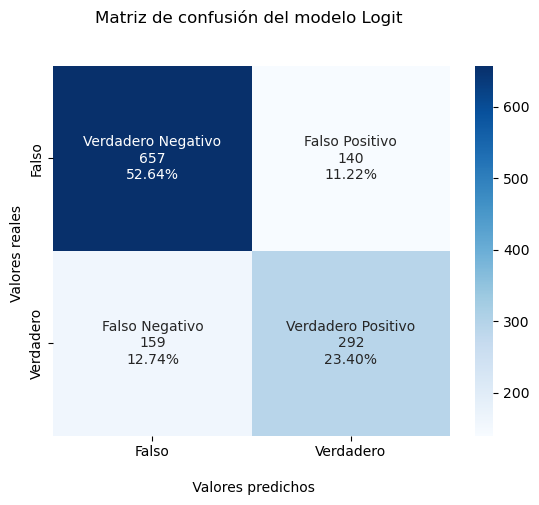

In [26]:
# Matriz de confusión

# Me inspiré de: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

mc_log = confusion_matrix(Y_test, Y_pred_log)

print('Matroz de confusión del modelo LOGIT:')
print(mc_log)

#Plot de la Matriz
group_names = ['Verdadero Negativo','Falso Positivo','Falso Negativo','Verdadero Positivo']

group_counts = ["{0:0.0f}".format(value) for value in
                mc_log.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     mc_log.flatten()/np.sum(mc_log)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(mc_log, annot=labels, fmt='', cmap='Blues')

ax.set_title('Matriz de confusión del modelo Logit \n\n');
ax.set_xlabel('\n Valores predichos')
ax.set_ylabel('Valores reales ');
ax.xaxis.set_ticklabels(['Falso','Verdadero'])
ax.yaxis.set_ticklabels(['Falso','Verdadero'])

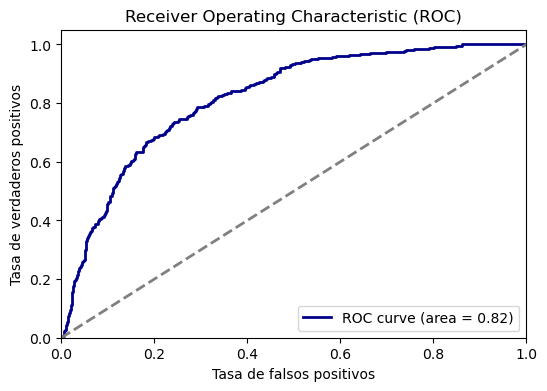

In [27]:
# Imprimimos la curva de ROC

Y_pred_log_proba = log_reg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_log_proba)
np.set_printoptions(suppress = True)
roc_auc_log = roc_auc_score(Y_test, Y_pred_log_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkblue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_log))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [28]:
# Imprimimos el valor AUC

auc_log = roc_auc_score(Y_test, Y_pred_log)
print('\n \n El valor AUC del método Logit es: %.3f \n \n' % auc_log)


 
 El valor AUC del método Logit es: 0.736 
 



In [29]:
# Calculamos el Accuracy:

accuracy = accuracy_score(Y_test, Y_pred_log)
print('\n \n El Accuracy del método Logit es de : %f \n \n' % accuracy)


 
 El Accuracy del método Logit es de : 0.760417 
 



### 2. Análisis de Discriminante Lineal (LDA)

In [30]:
# Ahora usamos el método de LDA.

lda = LinearDiscriminantAnalysis()
lda = lda.fit(X_train, Y_train)
Y_pred_lda = lda.predict(X_test)


C:\Users\cufa9\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Matroz de confusión del modelo LOGIT:
[[647 150]
 [146 305]]


[Text(0, 0.5, 'Falso'), Text(0, 1.5, 'Verdadero')]

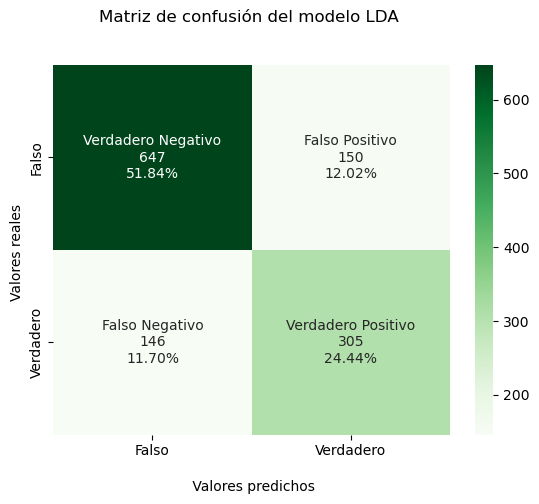

In [31]:
# Matriz de confusión

# Me inspiré de: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

mc_lda = confusion_matrix(Y_test, Y_pred_lda)

print('Matroz de confusión del modelo LOGIT:')
print(mc_lda)

#Plot de la Matriz
group_names = ['Verdadero Negativo','Falso Positivo','Falso Negativo','Verdadero Positivo']

group_counts = ["{0:0.0f}".format(value) for value in
                mc_lda.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     mc_lda.flatten()/np.sum(mc_lda)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(mc_lda, annot=labels, fmt='', cmap='Greens')

ax.set_title('Matriz de confusión del modelo LDA \n\n');
ax.set_xlabel('\n Valores predichos')
ax.set_ylabel('Valores reales ');
ax.xaxis.set_ticklabels(['Falso','Verdadero'])
ax.yaxis.set_ticklabels(['Falso','Verdadero'])

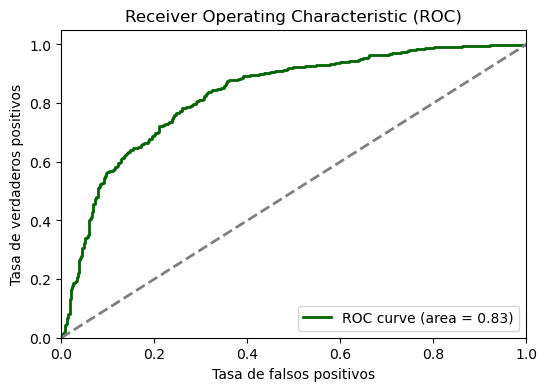

In [32]:
# Imprimimos la curva de ROC

Y_pred_lda_proba = lda.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_lda_proba)
np.set_printoptions(suppress = True)
roc_auc_lda = roc_auc_score(Y_test, Y_pred_lda_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkgreen', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_lda))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [33]:
# Imprimimos el valor AUC

auc_lda = roc_auc_score(Y_test, Y_pred_lda)
print('\n \n El valor AUC del método LDA es: %.3f \n \n' % auc_lda)


 
 El valor AUC del método LDA es: 0.744 
 



In [34]:
# Calculamos el Accuracy:

accuracy_lda = accuracy_score(Y_test, Y_pred_lda)
print("La precisión del método LDA es: %.2f" %accuracy_lda)

La precisión del método LDA es: 0.76


### 3. Vecinos Cercanos (KNN)

In [35]:
# Realizamos la estimación con el método de KNN, con 3 vecinos cercanos.

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)


C:\Users\cufa9\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Matroz de confusión del modelo KNN:
[[619 178]
 [173 278]]


[Text(0, 0.5, 'Falso'), Text(0, 1.5, 'Verdadero')]

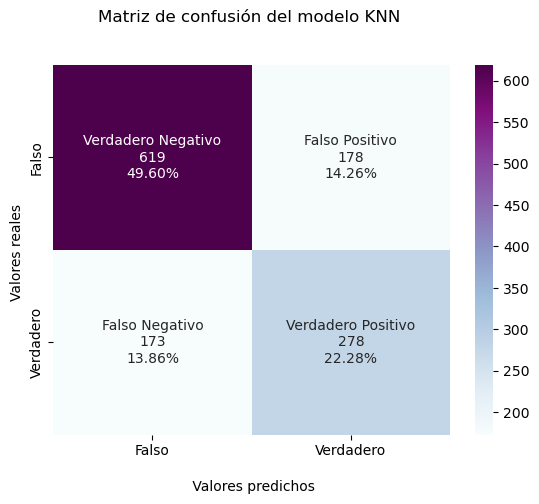

In [36]:
# Matriz de confusión

# Me inspiré de: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

mc_knn = confusion_matrix(Y_test, Y_pred_knn)

print('Matroz de confusión del modelo KNN:')
print(mc_knn)

#Plot de la Matriz
group_names = ['Verdadero Negativo','Falso Positivo','Falso Negativo','Verdadero Positivo']

group_counts = ["{0:0.0f}".format(value) for value in
                mc_knn.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     mc_knn.flatten()/np.sum(mc_knn)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(mc_knn, annot=labels, fmt='', cmap='BuPu')

ax.set_title('Matriz de confusión del modelo KNN \n\n');
ax.set_xlabel('\n Valores predichos')
ax.set_ylabel('Valores reales ');
ax.xaxis.set_ticklabels(['Falso','Verdadero'])
ax.yaxis.set_ticklabels(['Falso','Verdadero'])

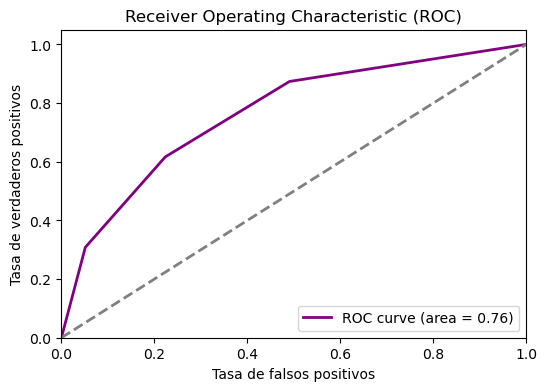

In [37]:
# Imprimimos la curva de ROC

Y_pred_knn_proba = knn.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_knn_proba)
np.set_printoptions(suppress = True)
roc_auc_knn = roc_auc_score(Y_test, Y_pred_knn_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='purple', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [38]:
# Imprimimos el valor AUC

auc_knn = roc_auc_score(Y_test, Y_pred_knn)
print('\n \n El valor AUC del método KNN es: %.3f \n \n' % auc_knn)


 
 El valor AUC del método KNN es: 0.697 
 



In [39]:
# Calculamos el Accuracy:

accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
print("La precisión del método KNN es: %.2f" %accuracy_knn)

La precisión del método KNN es: 0.72




4. ¿Cúal de los tres métodos predice mejor? Justifiquen detalladamente utilizando las medidas de precisión que conocen.

Respuesta en el PDF.

5. Con el método que seleccionaron, predigan qué personas son pobres dentro de la base norespondieron. ¿Qué proporción de las personas que no respondieron pudieron identificar como pobres?

In [40]:
#Predecimos con el modelo Logit sobre la base norespondieron, porque su Accuracy y Auc son mayores.
norespondieron_clean['intercepto'] = 1

norespondieron_clean = norespondieron_clean[['intercepto'] + [col for col in norespondieron_clean if col != 'intercepto']]
y_pred_nr = lda.predict(norespondieron_clean)

pobres_nr=np.sum(y_pred_nr)
tasa_pobreza_nr=np.sum(y_pred_nr)/len(y_pred_nr)


print('\n',"La cantidad de pobres predicha en la muestra que no respondio es de:", pobres_nr, "de", len(y_pred_nr),'\n')
print("La tasa de pobreza predicha en la muestra de los que no respondieron es de:", round(tasa_pobreza_nr*100,2), "%")




 La cantidad de pobres predicha en la muestra que no respondio es de: 943 de 1786 

La tasa de pobreza predicha en la muestra de los que no respondieron es de: 52.8 %


6. Noten que para correr los tres métodos se utilizaron todas las variables disponibles como predictores. ¿Les parece esto correcto? ¿Qué variables habrían conservado? Con las variables seleccionadas, implementen únicamente el modelo logit nuevamente y comparen las medidas de precisión obtenidas con los resultados del modelo logit anterior. ¿Cambió mucho la precisión?

In [41]:
# Procedemos con nuestro filtrado.

columns_to_drop = ['CODUSU','MAS_500','CH05','CH15_COD','CH16_COD','PP04D_COD','PP09A_ESP','PP09C_ESP','PP11D_COD','PP06A','PP06C','PP06D','PP06E','PP06H','PP08D1', 'PP08D4','PP08F1','PP08F2','PP08J1','PP08J2','PP08J3','P21','DECOCUR','IDECOCUR','RDECOCUR','GDECOCUR','PDECOCUR','ADECOCUR','PONDIIO','TOT_P12','P47T','DECINDR','IDECINDR','RDECINDR','GDECINDR','PDECINDR','ADECINDR','PONDII','PONDII','V3_M','V4_M','V5_M','V8_M','V9_M','V10_M','V11_M','V12_M','V18_M','V19_AM','V21_M','T_VI','ITF','DECIFR','IDECIFR','RDECIFR','GDECIFR','PDECIFR','ADECIFR','IPCF','DECCFR','IDECCFR','RDECCFR','GDECCFR','PDECCFR','ADECCFR','PONDIH','ingreso_necesario','adulto_equiv','ad_equiv_hogar']

# If you don't want to modify the original DataFrame, you can create a new one without the columns
respondieron_drop = respondieron.drop(columns_to_drop, axis=1)

# Calcular la cantidad de valores faltantes en cada columna
missing_counts_r = respondieron_drop.isnull().sum()

# Establecer un umbral para la cantidad máxima de valores faltantes permitidos
umbral_r = len(respondieron_drop) * 0  # Por ejemplo, permitiremos hasta el 20% de valores faltantes

# Seleccionar las columnas que superan el umbral
columnas_a_eliminar_r = missing_counts_r[missing_counts_r > umbral_r].index

# Eliminar las columnas seleccionadas del DataFrame
respondieron_drop = respondieron_drop.drop(columnas_a_eliminar_r, axis=1)

### Logit 2

In [42]:
# Asignamos las variables que serán predictores y la predicha
Y = respondieron_drop.loc[:, respondieron_drop.columns == "pobre"]
X = respondieron_drop.loc[:, respondieron_drop.columns != "pobre"]

# Agregamos la columna con 1s

X['intercepto'] = 1

# Lo colocamos al principio

X = X[['intercepto'] + [col for col in X if col != 'intercepto']]

# Partimos la base en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=201)

In [43]:
# Ajustamos el clasificador con fit con la base de entrenamiento

log_reg = LogisticRegression(max_iter=10000).fit(X_train, Y_train)

# Predecimos con la base test

Y_pred_log = log_reg.predict(X_test)

C:\Users\cufa9\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Matroz de confusión del modelo LOGIT:
[[681 116]
 [188 263]]


[Text(0, 0.5, 'Falso'), Text(0, 1.5, 'Verdadero')]

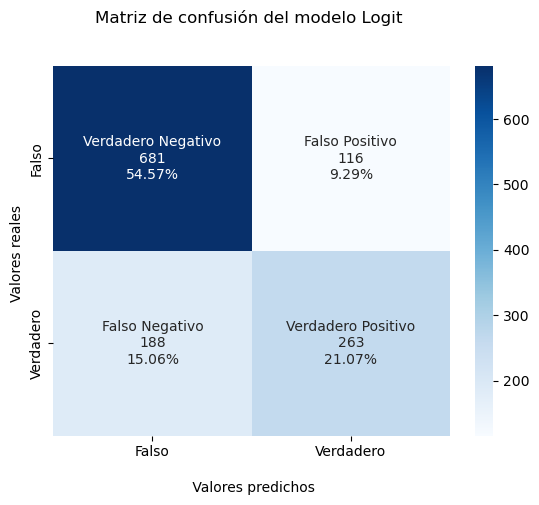

In [44]:
# Matriz de confusión

# Me inspiré de: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

mc_log = confusion_matrix(Y_test, Y_pred_log)

print('Matroz de confusión del modelo LOGIT:')
print(mc_log)

#Plot de la Matriz
group_names = ['Verdadero Negativo','Falso Positivo','Falso Negativo','Verdadero Positivo']

group_counts = ["{0:0.0f}".format(value) for value in
                mc_log.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     mc_log.flatten()/np.sum(mc_log)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(mc_log, annot=labels, fmt='', cmap='Blues')

ax.set_title('Matriz de confusión del modelo Logit \n\n');
ax.set_xlabel('\n Valores predichos')
ax.set_ylabel('Valores reales ');
ax.xaxis.set_ticklabels(['Falso','Verdadero'])
ax.yaxis.set_ticklabels(['Falso','Verdadero'])

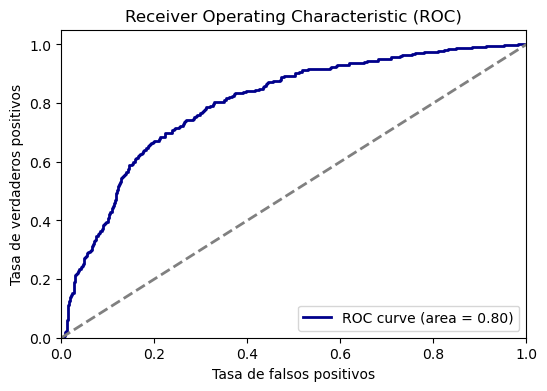

In [45]:
# Imprimimos la curva de ROC

Y_pred_log_proba = log_reg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_log_proba)
np.set_printoptions(suppress = True)
roc_auc_log = roc_auc_score(Y_test, Y_pred_log_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkblue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_log))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [46]:
# Imprimimos el valor AUC

auc_log = roc_auc_score(Y_test, Y_pred_log)
print('\n \n El valor AUC del método segundo Logit es: %.3f \n \n' % auc_log)


 
 El valor AUC del método segundo Logit es: 0.719 
 



In [47]:
# Calculamos el Accuracy:

accuracy = accuracy_score(Y_test, Y_pred_log)
print('\n \n El Accuracy del método segundo Logit es de : %f \n \n' % accuracy)


 
 El Accuracy del método segundo Logit es de : 0.756410 
 

